In [72]:
import os
import sys
from importlib import reload
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display

import dask
import h5py
import matplotlib.pyplot as plt
import numpy as np
import skimage
from dask.diagnostics import ProgressBar
from lmfit import CompositeModel, Model, fit_report
from lmfit.models import (
    ConstantModel,
    DoniachModel,
    GaussianModel,
    LorentzianModel,
    VoigtModel,
)
from scipy.ndimage import gaussian_filter
from skimage import transform




import sed
from sed import SedProcessor

# import spotsize
# from importlib import reload

In [73]:
config = "Scholz_Wind_update.yaml"

In [74]:
from scipy.optimize import curve_fit
from scipy.special import erfc


def gaussian(x, amp, cen, wid, c):
    return (amp * np.exp(-4 * np.log(2) * ((x - cen) / wid) ** 2)) + c

In [75]:
plt.rcParams["font.size"] = 20

# Create a folder to save the graphs in

In [76]:
# Specify the folder name
folder_name = "50131"
Run = "50131"

# Check if the folder already exists
if not os.path.exists(folder_name):
    # Create the folder
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder '50131m' already exists.


# Se 3d corelevel

In [77]:
run_number = [Run]
se = SedProcessor(
    runs=run_number,
    config=config,
    collect_metadata=True,
    save_parquet=True,
    force_recreate=True,
)

Configuration loaded from: [/home/noufalme/DataAnalysis/Scholz_Wind_update.yaml]
Default config loaded from: [/home/noufalme/DataAnalysis/sed/sed/.sed-venv/lib/python3.9/site-packages/sed/config/default.yaml]
Reading files: 21 new files of 21 total.


[Parallel(n_jobs=21)]: Using backend LokyBackend with 21 concurrent workers.
[Parallel(n_jobs=21)]: Done   4 out of  21 | elapsed:   19.0s remaining:  1.3min
[Parallel(n_jobs=21)]: Done   7 out of  21 | elapsed:   19.4s remaining:   38.9s
[Parallel(n_jobs=21)]: Done  10 out of  21 | elapsed:   19.8s remaining:   21.8s
[Parallel(n_jobs=21)]: Done  13 out of  21 | elapsed:   20.1s remaining:   12.4s
[Parallel(n_jobs=21)]: Done  16 out of  21 | elapsed:   23.1s remaining:    7.2s
[Parallel(n_jobs=21)]: Done  19 out of  21 | elapsed:   25.5s remaining:    2.7s
[Parallel(n_jobs=21)]: Done  21 out of  21 | elapsed:   26.9s finished


All files converted successfully!
Filling nan values...
Combined parquet file saved.
loading complete in  29.73 s


In [78]:
se.add_jitter()


In [79]:
# Adding energy column to dataframe:
se.append_energy_axis()

Adding energy column to dataframe:


In [80]:
# Increading Energy values.  Why?
se._dataframe["energy"] = se._dataframe["energy"] + 229

In [81]:
se._dataframe.compute()

,trainId,pulseId,electronId,timeStamp,dldPosX,dldPosY,dldTimeSteps,cryoTemperature,dldTimeBinSize,extractorCurrent,...,bam,monochromatorPhotonEnergyAverage,monoDelta1,monoDelta2,monoMirrorAngle,monoGratingAngle,delayStage,opticalDiode,dldSectorID,energy
0,1874351979,3,0,1.702196e+09,655.508067,697.508067,3474.508067,66.650002,0.020576,-0.089705,...,-110.34375,NaN,-2.349646,-1.802261,4.837524,3.222381,NaN,0.152921,3,1.584433
1,1874351979,3,1,1.702196e+09,646.286660,720.286660,3476.286660,66.650002,0.020576,-0.089705,...,-110.34375,NaN,-2.349646,-1.802261,4.837524,3.222381,NaN,0.152921,2,1.305205
2,1874351979,20,0,1.702196e+09,644.474439,565.474439,4499.474439,66.650002,0.020576,-0.089705,...,-107.37500,NaN,-2.349646,-1.802261,4.837524,3.222381,NaN,0.154484,6,-55.826867
3,1874351979,20,1,1.702196e+09,644.064187,561.064187,4498.064187,66.650002,0.020576,-0.089705,...,-107.37500,NaN,-2.349646,-1.802261,4.837524,3.222381,NaN,0.154484,5,-55.802195
4,1874351979,44,0,1.702196e+09,744.808970,608.808970,4562.808970,66.650002,0.020576,-0.089705,...,-110.06250,NaN,-2.349646,-1.802261,4.837524,3.222381,NaN,0.134824,6,-56.882603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70014,1874398528,431,1,1.702201e+09,604.513515,692.513515,3944.513515,66.639000,0.020576,-0.089268,...,-73.81250,386.918335,-2.349601,-1.802234,4.837569,3.222354,3536.810303,0.178175,1,-39.694112
70015,1874398528,462,0,1.702201e+09,852.707109,707.707109,4476.707109,66.639000,0.020576,-0.089268,...,-80.09375,386.918335,-2.349601,-1.802234,4.837569,3.222354,3536.810303,0.150618,7,-55.421994
70016,1874398528,463,0,1.702201e+09,547.611377,757.611377,5235.611377,66.639000,0.020576,-0.089268,...,-80.81250,386.918335,-2.349601,-1.802234,4.837569,3.222354,3536.810303,0.133672,1,-63.923554
70017,1874398528,475,0,1.702201e+09,603.158364,528.158364,4465.158364,66.639000,0.020576,-0.089268,...,-89.28125,386.918335,-2.349601,-1.802234,4.837569,3.222354,3536.810303,0.163039,5,-55.211149


In [82]:
# to display the plot directly below the code cell that produced it.
%matplotlib inline

## Energy delay Se Calculations

In [83]:
# Best ranges and bins for specific run

ranges = [[-60, -52], [3535.9, 3541.1]]
bins = [200, 160]


In [84]:
# Energy delay Se Calculations (Before BAM correction)

axes = ["energy", "delayStage"]
seb = se.compute(axes=axes, ranges=ranges, bins=bins, normalize_to_acquisition_time = "delayStage" )

senorm = seb / seb.mean("energy")

  0%|          | 0/1 [00:00<?, ?it/s]

Calculate normalization histogram for axis 'delayStage'...


### Energy delay Se Graph

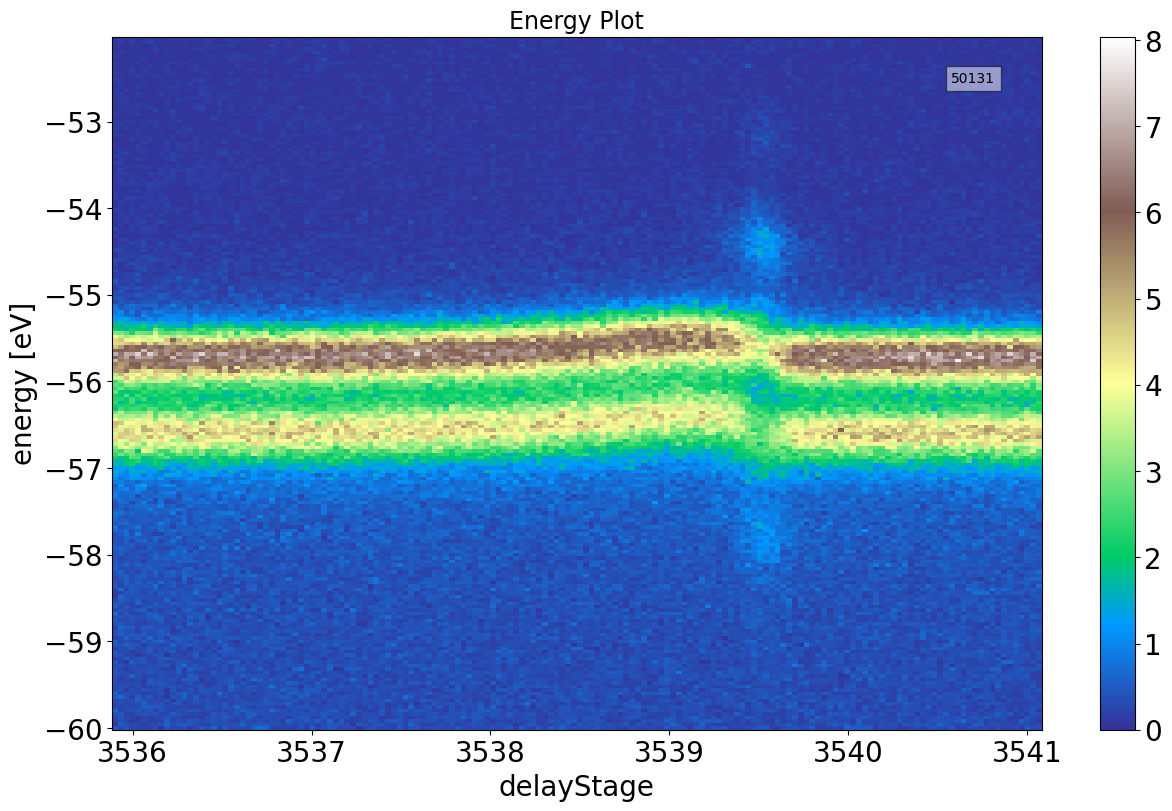

In [86]:
plt.figure(figsize=(15, 9))

senorm.plot(cmap="terrain")


# Add a box with a name in the top right corner
plt.text(
    0.95,
    0.95,
    Run,
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
    transform=plt.gca().transAxes,
)

# Add a title to the plot
plt.title("Energy Plot", fontsize=17)

plot_path = os.path.join(folder_name, "{}_Eng_Delaystage.png".format(Run))

# Save the plot in the folder
plt.savefig(plot_path)


plt.show()

## Fitting sidebands


In [87]:
# code for finding sidebands

from ipywidgets import IntRangeSlider, interact


# Define the function for plotting with interactive widget
def plot_with_ranges(row_range1, row_range2):
    plt.figure(figsize=(12, 8))
    # Plot the data
    senorm[row_range1[0] : row_range1[1], :].plot(cmap="terrain", label="Range 1")
    senorm[row_range2[0] : row_range2[1], :].plot(cmap="terrain", label="Range 2")

    # Set ylim
    plt.ylim(-60, -52)

    # Display legend
    plt.legend()

    # Show corresponding energy values
    print("Energy values for Range 1:")
    print(senorm.energy[row_range1[0] : row_range1[1]])
    print("\nEnergy values for Range 2:")
    print(senorm.energy[row_range2[0] : row_range2[1]])

    # Show the plot
    plt.show()


# Create the interactive widgets for controlling the row ranges
row_range_slider1 = IntRangeSlider(
    value=[130, 150], min=0, max=senorm.shape[0], step=1, description="Range 1:"
)
row_range_slider2 = IntRangeSlider(
    value=[160, 180], min=0, max=senorm.shape[0], step=1, description="Range 2:"
)

# Display the interactive widgets and plot
interact(plot_with_ranges, row_range1=row_range_slider1, row_range2=row_range_slider2)

interactive(children=(IntRangeSlider(value=(130, 150), description='Range 1:', max=200), IntRangeSlider(value=…

<function __main__.plot_with_ranges(row_range1, row_range2)>

# changing int values to find best fit
First order

In [88]:
# changing int values to find best fit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy.optimize import curve_fit

# Define the data
x = senorm["delayStage"]
y = senorm[128:148, :].sum("energy")
init_vals = [12, 3539.8, 0.4, 0.002]  # Initial guess for parameters

# Fit the Gaussian function to the data
best_vals, covar = curve_fit(gaussian, x, y, init_vals)

# Define a function to update the plot based on the values of the Gaussian parameters
def update_plot(amp=0.12, cen=3539.8, wid=0.4, c=0.002):
    plt.figure()
    plt.plot(x, y, "ro", label="Data")
    plt.plot(x, gaussian(x, amp, cen, wid, c), label="Fit")
    plt.xlabel("DelayStage", fontsize=14)
    plt.ylabel("Energy [eV]", fontsize=14)
    plt.legend(fontsize="14", loc="upper left")
    plt.title("Gaussian Fit", fontsize=17)
    plt.show()


# Create widgets for each Gaussian parameter
amp_slider = widgets.FloatSlider(value=5.42, min=0, max=15, step=0.2, description="amp")
cen_slider = widgets.FloatSlider(
    value=3539.5, min=3538, max=3540, step=0.1, description="cen"
)
wid_slider = widgets.FloatSlider(
    value=0.4, min=0.1, max=1, step=0.01, description="wid"
)
c_slider = widgets.FloatSlider(value=0.002, min=0, max=50, step=0.2, description="c")

# Link the widgets to the plot
widgets.interactive(
    update_plot, amp=amp_slider, cen=cen_slider, wid=wid_slider, c=c_slider
)

interactive(children=(FloatSlider(value=5.42, description='amp', max=15.0, step=0.2), FloatSlider(value=3539.5…

['amp', 'cen', 'wid', 'c']
[1.56165487e+01 3.53952116e+03 2.73643818e-01 3.11465391e+00]
[0.33656156 0.0028709  0.00691074 0.05783437]


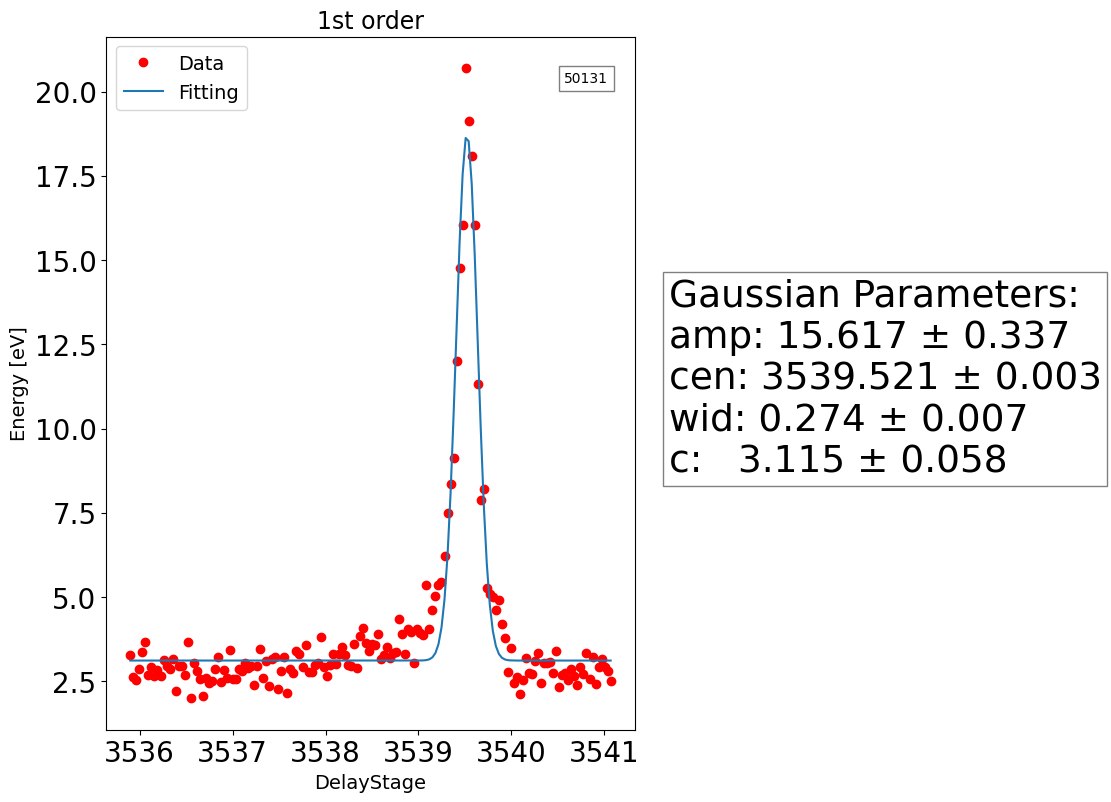

In [89]:
#%matplotlib notebook
# first order sideband:
x1 = senorm["delayStage"]
y1 = senorm[128:148, :].sum("energy")
init_vals = [10, 3539.5, 0.4, 2.8]  # Next cell finds best fit for [amp, cen, wid, c]
best_vals1, covar1 = curve_fit(gaussian, x1, y1, init_vals)

print(["amp", "cen", "wid", "c"])
print(best_vals1)
perr1 = np.sqrt(np.diag(covar1))
print(perr1)

plt.figure(figsize=(15, 9))
# Add subplot for the main plot
plt.subplot(1, 2, 1)

plt.plot(x1, y1, "ro", label="Data")
plt.plot(x1, gaussian(x1, *best_vals1), label="Fitting")
# Add labels to the axes
plt.xlabel("DelayStage", fontsize=14)
plt.ylabel("Energy [eV]", fontsize=14)


# Add legend
plt.legend(fontsize="14", loc="upper left")


# Add a box with a name in the top right corner
plt.text(
    0.95,
    0.95,
    Run,
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
    transform=plt.gca().transAxes,
)

# Add a title to the plot
plt.title("1st order", fontsize=17)


# Add a box with Gaussian parameters and standard deviation
box_text = "Gaussian Parameters:\n"
box_text += "amp: {:.3f} ± {:.3f}\n".format(best_vals1[0], perr1[0])
box_text += "cen: {:.3f} ± {:.3f}\n".format(best_vals1[1], perr1[1])
box_text += "wid: {:.3f} ± {:.3f}\n".format(best_vals1[2], perr1[2])
box_text += "c:   {:.3f} ± {:.3f}".format(best_vals1[3], perr1[3])
plt.text(
    0.5,
    0.5,
    box_text,
    fontsize=27,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="left",
    verticalalignment="center",
    transform=plt.gcf().transFigure,
)

plot_path = os.path.join(folder_name, "{}_1storder.png".format(Run))

# Save the plot in the folder
plt.savefig(plot_path)

In [90]:
%matplotlib inline

## shifting the time axis based on the center of the Gaussian fit

In [91]:
t0 = 3.53952100e+03

In [92]:
se._dataframe["DelayT"] = t0 - se._dataframe["delayStage"]

In [93]:
axes = ["energy", "DelayT"]
ranges = [[-59, -52], [-1.56, 3.7]]
bins = [200, 160]
seb = se.compute(axes=axes, ranges=ranges, bins=bins)
senorm = seb / seb.mean("energy")

  0%|          | 0/1 [00:00<?, ?it/s]

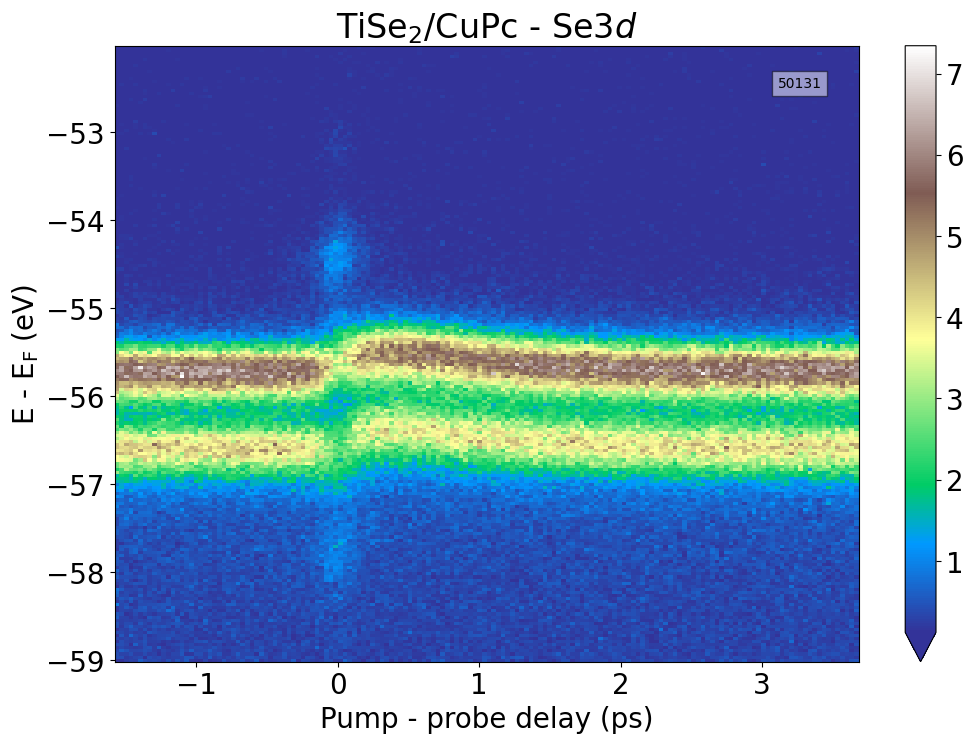

In [94]:
plt.figure(figsize=(12, 8))
senorm.plot(cmap="terrain", vmin=0.12)

# plt.gca().invert_yaxis()
# plt.ylim(286.5,282.2)


plt.title("TiSe$_2$/CuPc - Se3$d$")

plt.xlabel("Pump - probe delay (ps)")
plt.ylabel("E - $ \mathrm{E}_\mathrm{F}$ (eV)")

# Add a box with a name in the top right corner
plt.text(
    0.95,
    0.95,
    Run,
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
    transform=plt.gca().transAxes,
)




plot_path = os.path.join(folder_name, "{}__Se3d_noblur.png".format(Run))
# Save the plot in the folder
plt.savefig(plot_path)


# plt.savefig('C1s_highfluence_noblur.png',dpi=200)

plt.show()


# plt.figure()
# hfnorm.sum('Delay').plot()
# plt.show()

In [95]:
# Gaussian filtering for smoothing and denoising data.
blurse = gaussian_filter(senorm, sigma=1)

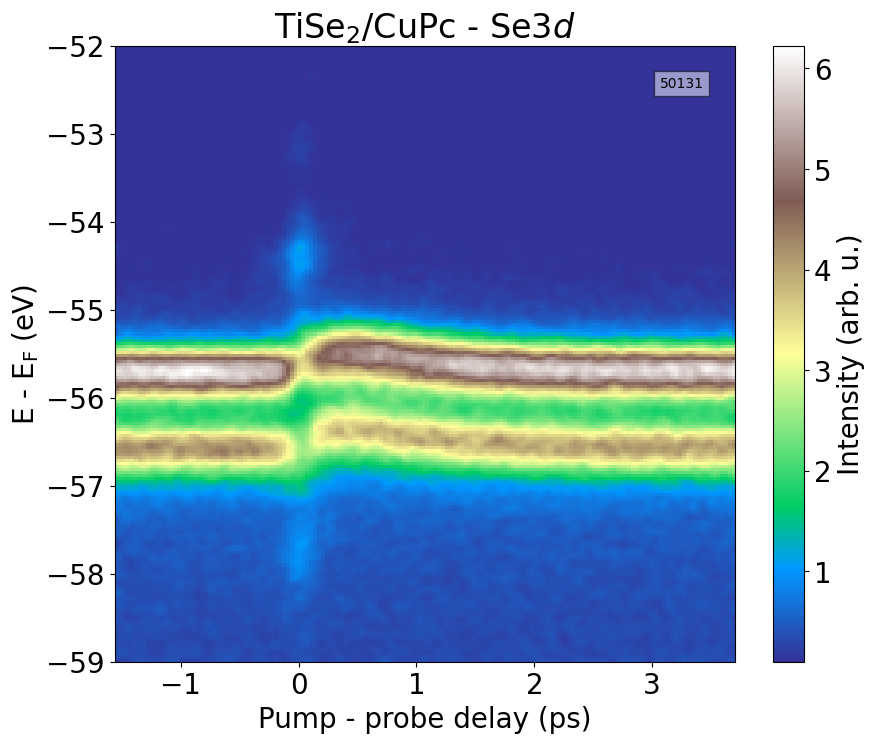

In [96]:
plt.figure(figsize=(10, 8))
plt.imshow(
    blurse, cmap="terrain", vmin=0.1, extent=(-1.56, 3.7, -52, -59), aspect="auto"
)
plt.gca().invert_yaxis()

plt.title("TiSe$_2$/CuPc - Se3$d$")

# Add a box with a name in the top right corner
plt.text(
    0.95,
    0.95,
    Run,
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
    transform=plt.gca().transAxes,
)


plt.xlabel("Pump - probe delay (ps)")
plt.ylabel("E - $ \mathrm{E}_\mathrm{F}$ (eV)")

plt.colorbar(label="Intensity (arb. u.)")


plot_path = os.path.join(folder_name, "{}__Se3d.png".format(Run))
# Save the plot in the folder
plt.savefig(plot_path)


plt.show()

In [97]:
diffse = senorm - senorm.sel(DelayT=slice(-1.3, -0.5)).mean("DelayT")

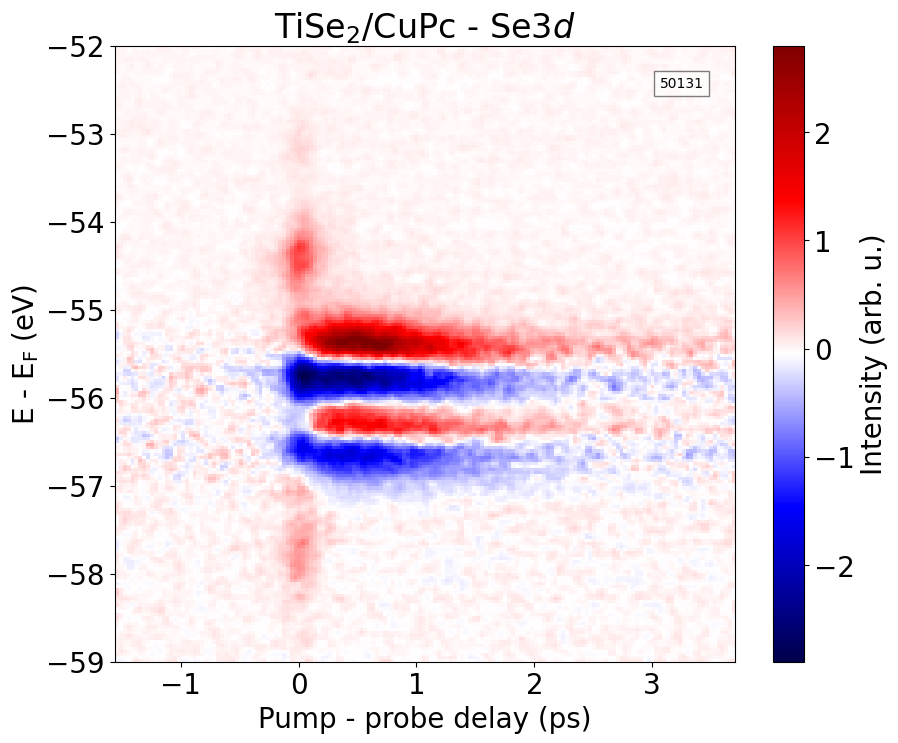

In [98]:
diffseblur = gaussian_filter(diffse, sigma=0.8)
plt.figure(figsize=(10, 8))

plt.imshow(
    diffseblur, cmap="seismic", vmax=2.80, extent=(-1.56, 3.7, -52, -59), aspect="auto"
)
plt.gca().invert_yaxis()

plt.title("TiSe$_2$/CuPc - Se3$d$")

# Add a box with a name in the top right corner
plt.text(
    0.95,
    0.95,
    Run,
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
    transform=plt.gca().transAxes,
)

plt.xlabel("Pump - probe delay (ps)")
plt.ylabel("E - $ \mathrm{E}_\mathrm{F}$ (eV)")

plt.colorbar(label="Intensity (arb. u.)")


plot_path = os.path.join(folder_name, "{}__Se3d_diff.png".format(Run))

# Save the plot in the folder
plt.savefig(plot_path)

plt.show()